# Using SciKit Image and Filters

In [16]:
from skimage import io 
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean 

In [14]:
image = io.imread("hand1.jpeg", as_gray = True)

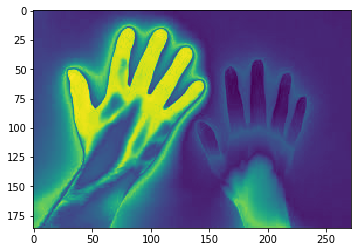

In [15]:
plt.imshow(image)

In [23]:
print(image.shape)

(186, 272)


In [18]:
rescaled_image = rescale(image, 1.0/4.0, multichannel = True, anti_aliasing=True) # have to say what rescaling by 4 times, ig has frimges 

In [24]:
rescaled_image.shape #x axis got rescaled by 4 times

(46, 272)

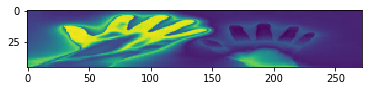

In [26]:
plt.imshow(rescaled_image)

In [28]:
resized_image = resize(image, (200,200)) # resized image to 200,200

In [29]:
resized_image.shape

(200, 200)

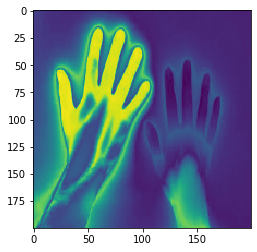

In [32]:
plt.imshow(resized_image)

In [30]:
downscaled_image = downscale_local_mean(image, (4,3)) #downsizing (192, 272) by (4,3) block and taking the mean value

In [35]:
272/3

90.66666666666667

In [31]:
downscaled_image.shape

(47, 91)

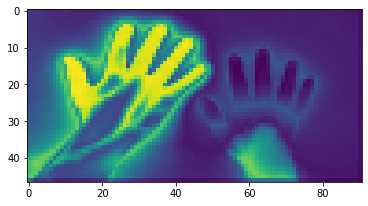

In [33]:
plt.imshow(downscaled_image)

In [37]:
# edge detection has different filters we can see 4 here

In [38]:
from skimage.filters import roberts, sobel, scharr, prewitt

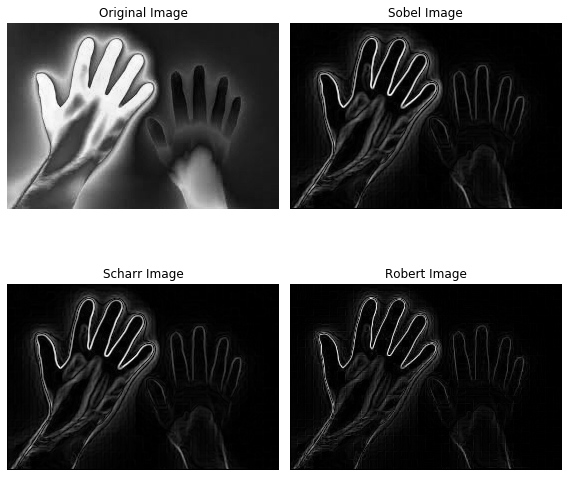

In [50]:
#depending of the image we can select edge filtering

edge_robert = roberts(image) # iamge will be of same type of as original image but will be of change size
edge_sobel = sobel(image)
edge_scharr = scharr(image)
edge_prewitt = prewitt(image)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex= True, sharey=True, figsize=(8,8))

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Image')

ax[2].imshow(edge_scharr, cmap=plt.cm.gray)
ax[2].set_title('Scharr Image')

ax[3].imshow(edge_robert, cmap=plt.cm.gray)
ax[3].set_title('Robert Image')

#ax[4].imshow(edge_prewitt, cmap=plt.cm.gray)
#ax[4].set_title('Prewitt Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()




In [51]:
from skimage.feature import canny # canny edge image is binary image

In [56]:
edge_canny = canny(image, sigma=2) # sigma controls the amount of edge detection. It does noise reduction, 

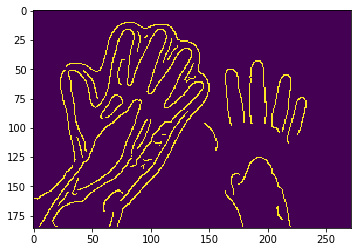

In [57]:
plt.imshow(edge_canny) # if increase sigma the amount of edge goes down

# De convolution

from Miscrospicy point of view, when a blurred image from microsope, the light at specific spot, 
it has spread region, so when imaging process the halo also contribute. 
Deconvolution is get that image back to that one point if we know the source. It is called point spread function. 

the image need point spread function and image

HOw to create matrix gaussian kernel for point spread function

In [61]:
from skimage import restoration
import numpy as np

In [62]:
psg = np.ones((3,3)) / 9  #define the point spread function. 
                         #we dividing by one so the image energy remains the same. therefore we normalize the psg

In [63]:
deconvolution, _ = restoration.unsupervised_wiener(image, psg)#psg is matrix of number why the image is blurred. math rep.

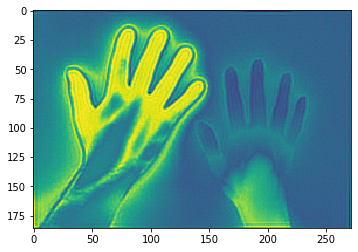

In [65]:
plt.imshow(deconvolution)

In [66]:
plt.imsave('deconvolution1.jpeg', deconvolution, cmap='gray')